<a href="https://colab.research.google.com/github/MinhDat13/B-i_t-p_AI/blob/main/W4_25_02_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a6d2a6171216f0e346efe5af2ee6f2bffa30fb2ca9cf313a3b307b3abbff5e4f
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


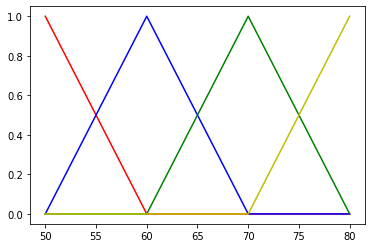

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(50,81,1)
slow = fuzz.trimf(x,[50,50,60])
medium = fuzz.trimf(x,[50,60,70])
medium_fast = fuzz.trimf(x,[60,70,80])
fullspeed = fuzz.trimf(x,[70,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label ='slow')
plt.plot(x,medium,'b',linewidth=1.5,label ='medium')
plt.plot(x,medium_fast,'g',linewidth=1.5,label ='medium_fast')
plt.plot(x,fullspeed,'y',linewidth=1.5,label ='fullspeed')

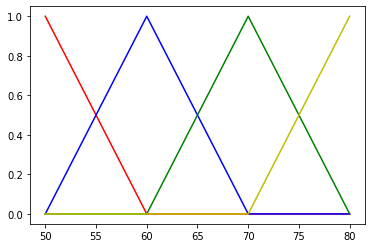

In [5]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(50,81,1)
slow = fuzz.trapmf(x,[50,50,50,60])
medium = fuzz.trapmf(x,[50,60,60,70])
medium_fast = fuzz.trapmf(x,[60,70,70,80])
fullspeed = fuzz.trapmf(x,[70,80,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label ='slow')
plt.plot(x,medium,'b',linewidth=1.5,label ='medium')
plt.plot(x,medium_fast,'g',linewidth=1.5,label ='medium_fast')
plt.plot(x,fullspeed,'y',linewidth=1.5,label ='fullspeed')

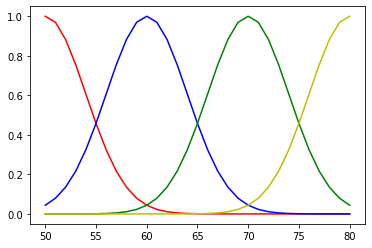

In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(50,81,1)
slow = fuzz.gaussmf(x,50,4)
medium = fuzz.gaussmf(x,60,4)
medium_fast = fuzz.gaussmf(x,70,4)
fullspeed = fuzz.gaussmf(x,80,4)
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label ='slow')
plt.plot(x,medium,'b',linewidth=1.5,label ='medium')
plt.plot(x,medium_fast,'g',linewidth=1.5,label ='medium_fast')
plt.plot(x,fullspeed,'y',linewidth=1.5,label ='fullspeed')

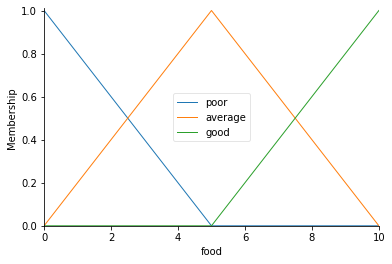

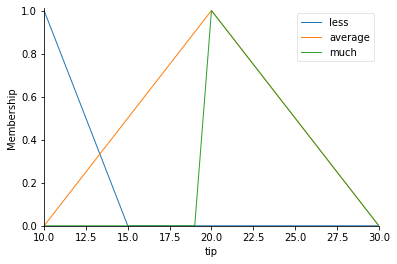

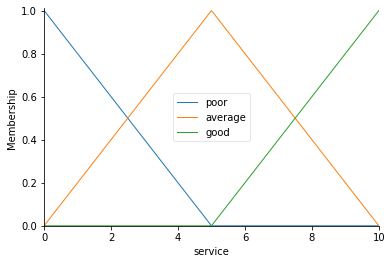

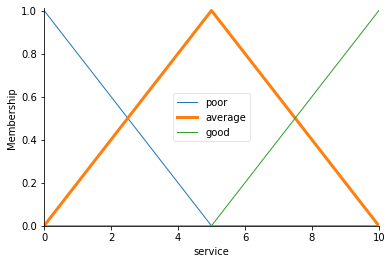

In [15]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
tip['less'] = fuzz.trimf(tip.universe,[10,10,15])
tip['average'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,20,30])
food.view()
tip.view()
service.view()
#service['average'].view() #to dam phaan tu chon




23.20769230769231


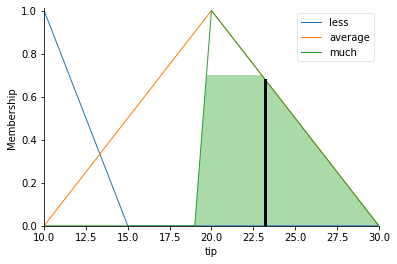

In [22]:
import typing_extensions
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
tip['less'] = fuzz.trimf(tip.universe,[10,10,15])
tip['average'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,20,30])
#food.view()
#tip.view()
#service.view()
rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['average'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['much'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['average'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['much'])
rule6 = ctrl.Rule(food['average'] & service['poor'], tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['average'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['average'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 5.3
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

26.15664160401003


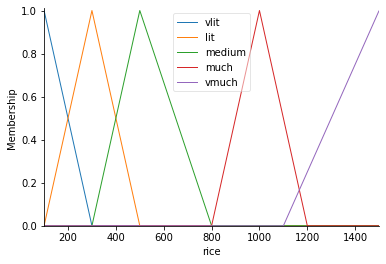

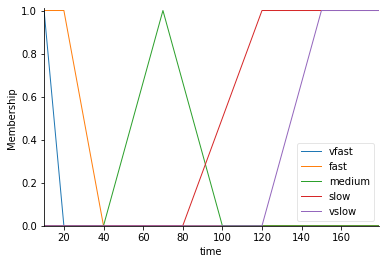

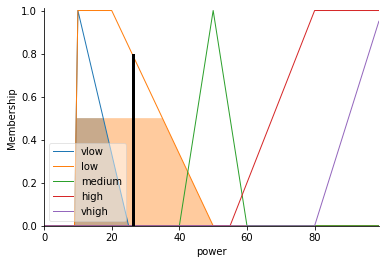

In [41]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
rice = ctrl.Antecedent(np.arange(100,1500,1),'rice')
time = ctrl.Antecedent(np.arange(10,180,1),'time')
power = ctrl.Consequent(np.arange(0,100,1),'power')

rice['vlit'] = fuzz.trimf(rice.universe,[100,100,300])
rice['lit'] = fuzz.trimf(rice.universe,[100,300,500])
rice['medium'] = fuzz.trimf(rice.universe,[300,500,800])
rice['much'] = fuzz.trimf(rice.universe,[800,1000,1200])
rice['vmuch'] = fuzz.trimf(rice.universe,[1100,1500,1500])

time['vfast'] = fuzz.trimf(time.universe,[10,10,20])
time['fast'] = fuzz.trapmf(time.universe,[10,10,20,40])
time['medium'] = fuzz.trimf(time.universe,[40,70,100])
time['slow'] = fuzz.trapmf(time.universe,[80,120,180,180])
time['vslow'] = fuzz.trapmf(time.universe,[120,150,180,180])

power['vlow'] = fuzz.trimf(power.universe,[10,10,25])
power['low'] = fuzz.trapmf(power.universe,[10,10,20,50])
power['medium'] = fuzz.trimf(power.universe,[40,50,60])
power['high'] = fuzz.trapmf(power.universe,(55,80,100,100))
power['vhigh'] = fuzz.trimf(power.universe,[80,100,100])

rice.view()
time.view()

rule1 = ctrl.Rule(rice['vlit'] & time['vslow'], power['vlow'])
rule2 = ctrl.Rule(rice['vlit'] & time['slow'], power['vlow'])
rule3 = ctrl.Rule(rice['vlit'] & time['medium'], power['low'])
rule4 = ctrl.Rule(rice['vlit'] & time['fast'], power['medium'])
rule5 = ctrl.Rule(rice['vlit'] & time['vfast'], power['medium'])

rule6 = ctrl.Rule(rice['lit'] & time['vslow'], power['vlow'])
rule7 = ctrl.Rule(rice['lit'] & time['slow'], power['low'])
rule8 = ctrl.Rule(rice['lit'] & time['medium'], power['low'])
rule9 = ctrl.Rule(rice['lit'] & time['fast'], power['medium'])
rule10 = ctrl.Rule(rice['lit'] & time['vfast'], power['high'])

rule11 = ctrl.Rule(rice['medium'] & time['vslow'], power['low'])
rule12 = ctrl.Rule(rice['medium'] & time['slow'], power['low'])
rule13 = ctrl.Rule(rice['medium'] & time['medium'], power['medium'])
rule14 = ctrl.Rule(rice['medium'] & time['fast'], power['high'])
rule15 = ctrl.Rule(rice['medium'] & time['vfast'], power['high'])

rule16 = ctrl.Rule(rice['much'] & time['vslow'], power['high'])
rule17 = ctrl.Rule(rice['much'] & time['slow'], power['medium'])
rule18 = ctrl.Rule(rice['much'] & time['medium'], power['high'])
rule19 = ctrl.Rule(rice['much'] & time['fast'], power['vhigh'])
rule20 = ctrl.Rule(rice['much'] & time['vfast'], power['vhigh'])

rule21 = ctrl.Rule(rice['vmuch'] & time['vslow'], power['medium'])
rule22 = ctrl.Rule(rice['vmuch'] & time['slow'], power['high'])
rule23 = ctrl.Rule(rice['vmuch'] & time['medium'], power['high'])
rule24 = ctrl.Rule(rice['vmuch'] & time['fast'], power['vhigh'])
rule25 = ctrl.Rule(rice['vmuch'] & time['vfast'], power['vhigh'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25 ])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['rice'] = 200
tipping.input['time'] = 170
tipping.compute()
print(tipping.output['power'])
power.view(sim=tipping)


